In [10]:
# !pip install pandas matplotlib seaborn scipy

In [6]:
import pandas as pd
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

          win_prob  hyperbole_label
count  1499.000000       1499.00000
mean      0.486784          0.24483
std       0.326437          0.43013
min       0.000000          0.00000
25%       0.187319          0.00000
50%       0.477688          0.00000
75%       0.772842          0.00000
max       1.000000          1.00000
Correlation between win_prob and hyperbole_label: -0.06782358890809487
T-test results: t-statistic = -2.6302247337611804, p-value = 0.008620337175214012


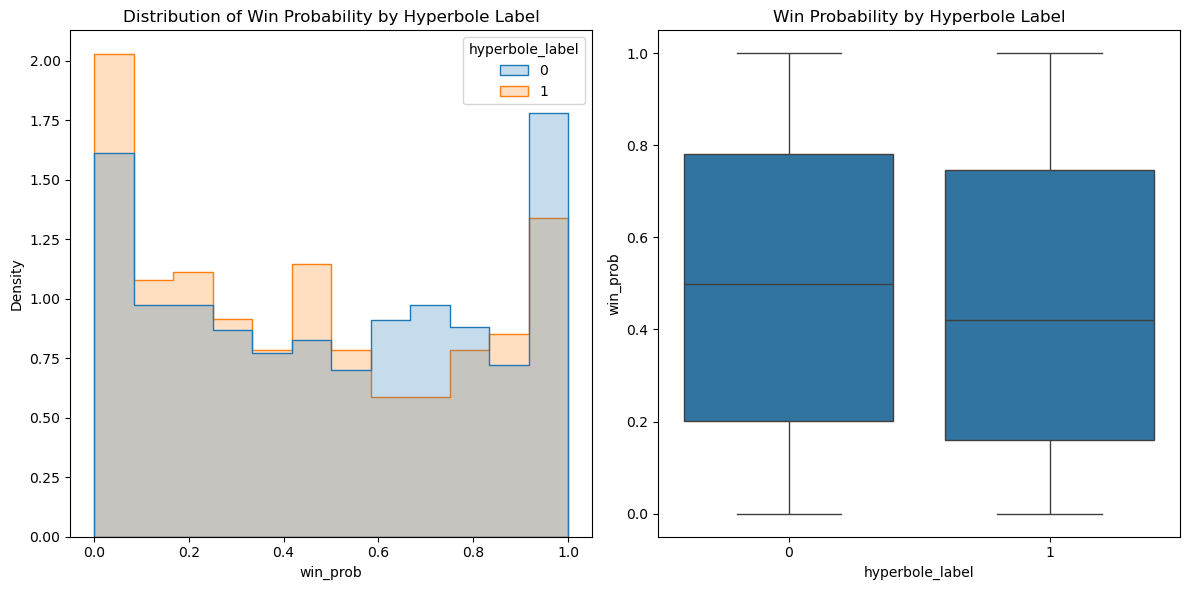

Average win probability for each hyperbole label:
hyperbole_label
0    0.499387
1    0.447913
Name: win_prob, dtype: float64

Percentage of hyperboles in different win probability ranges:
win_prob_range
0-20%      0.281843
20-40%     0.245059
40-60%     0.283465
60-80%     0.186508
80-100%    0.216763
Name: hyperbole_label, dtype: float64


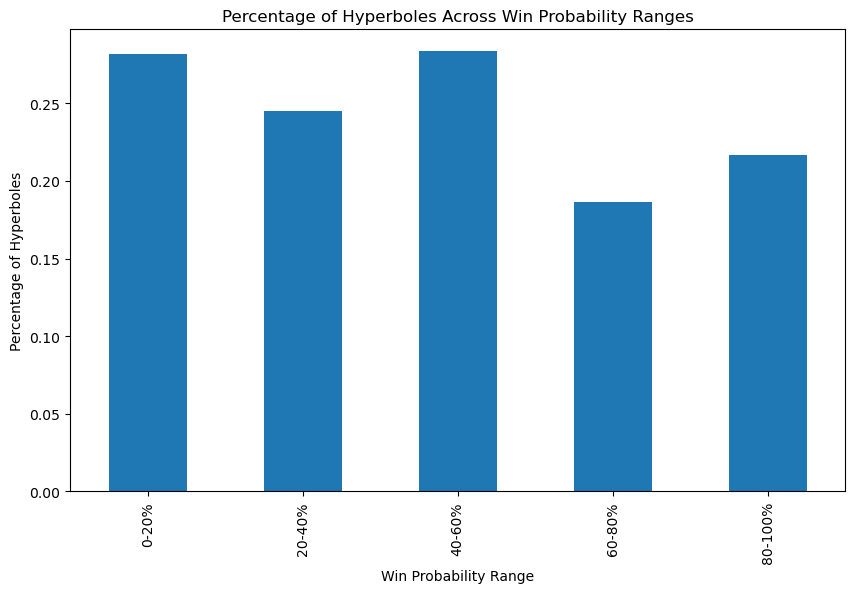

In [11]:
# Load the data
df = pd.read_csv('gold_data_annotated_hyperbole.tsv', sep='\t')

print(df[['win_prob', 'hyperbole_label']].describe())

# Calculate correlation
correlation = df['win_prob'].corr(df['hyperbole_label'])
print(f"Correlation between win_prob and hyperbole_label: {correlation}")

# Perform a t-test
hyperbole_win_probs = df[df['hyperbole_label'] == 1]['win_prob']
non_hyperbole_win_probs = df[df['hyperbole_label'] == 0]['win_prob']
t_stat, p_value = stats.ttest_ind(hyperbole_win_probs, non_hyperbole_win_probs)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Visualizations
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='win_prob', hue='hyperbole_label', element='step', stat='density', common_norm=False)
plt.title('Distribution of Win Probability by Hyperbole Label')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='hyperbole_label', y='win_prob')
plt.title('Win Probability by Hyperbole Label')

plt.tight_layout()
plt.show()

# Average win probability for each hyperbole label
avg_win_prob = df.groupby('hyperbole_label')['win_prob'].mean()
print("Average win probability for each hyperbole label:")
print(avg_win_prob)

# Calculate the percentage of hyperboles for different win probability ranges
df['win_prob_range'] = pd.cut(df['win_prob'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
hyperbole_percentage = df.groupby('win_prob_range')['hyperbole_label'].mean()
print("\nPercentage of hyperboles in different win probability ranges:")
print(hyperbole_percentage)

# Visualize the percentage of hyperboles across win probability ranges
plt.figure(figsize=(10, 6))
hyperbole_percentage.plot(kind='bar')
plt.title('Percentage of Hyperboles Across Win Probability Ranges')
plt.xlabel('Win Probability Range')
plt.ylabel('Percentage of Hyperboles')
plt.show()